<a href="https://colab.research.google.com/github/ekaterinatao/datatone_Pawfull/blob/master/Crue_Pawfull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import glob
import re
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#from pandasql import sqldf
import warnings
warnings.simplefilter("ignore")

# Functions

In [ ]:
# пока не заполнять, в конце соберу, что возможно в функции

In [ ]:
def col_year(col):
    col = re.findall(r'[0-9]+', col)[0]
    return col

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

# Preprocessing 
### Data cleaning 
### Dataset: Air pollution

In [ ]:
# чтение файлов 
!git clone https://github.com/EugeneBaev-dsu4/pawfull.git
CO = pd.read_excel('pawfull/aqdh-country-trends-major-air-pollutants-2003-2018.xlsx', sheet_name=5)
O3 = pd.read_excel('pawfull/aqdh-country-trends-major-air-pollutants-2003-2018.xlsx', sheet_name=9)
PM = pd.read_excel('pawfull/aqdh-country-trends-major-air-pollutants-2003-2018.xlsx', sheet_name=11)

fatal: destination path 'pawfull' already exists and is not an empty directory.


In [ ]:
CO.head()

,code,iso,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,876,WLF,Wallis and Futuna Islands,0.058569,0.056635,0.055689,0.054475,0.056712,0.052455,0.049982,0.050788,0.049598,0.050067,0.048616,0.048762,0.049999,0.048187,0.051362,0.050095
1,570,NIU,Niue,0.059838,0.058239,0.056967,0.055914,0.057780,0.053317,0.050798,0.051572,0.049778,0.051011,0.048137,0.048778,0.049933,0.048340,0.051866,0.050753
2,776,TON,Tonga,0.059927,0.058896,0.058301,0.056700,0.058044,0.053633,0.051075,0.052749,0.051293,0.051737,0.048889,0.049491,0.050606,0.049613,0.051790,0.050759
3,882,WSM,Samoa,0.060699,0.058907,0.058653,0.057342,0.059025,0.054557,0.051888,0.053584,0.051394,0.052414,0.050581,0.050653,0.052024,0.050672,0.052552,0.051334
4,184,COK,Cook Islands,0.059756,0.058554,0.057885,0.056303,0.058259,0.053418,0.050410,0.051857,0.049531,0.050904,0.047956,0.048062,0.049475,0.048105,0.052248,0.051419


##### Converting to suitable data types

In [ ]:
# оставляем нужные нам столбцы
CO_2015_2018 = CO[['country', 2015, 2016, 2017, 2018]]
O3_2015_2018 = O3[['country', 2015, 2016, 2017, 2018]]
PM_2015_2018 = PM[['country', 2015, 2016, 2017, 2018]]

In [ ]:
CO_2015_2018

,country,2015,2016,2017,2018
0,Wallis and Futuna Islands,0.049999,0.048187,0.051362,0.050095
1,Niue,0.049933,0.048340,0.051866,0.050753
2,Tonga,0.050606,0.049613,0.051790,0.050759
3,Samoa,0.052024,0.050672,0.052552,0.051334
4,Cook Islands,0.049475,0.048105,0.052248,0.051419
...,...,...,...,...,...
212,China,0.704168,0.688977,0.689349,0.693457
213,Bangladesh,0.693170,0.698953,0.645853,0.735738
214,Pakistan,0.724600,0.778792,0.747174,0.757198
215,India,0.728253,0.752007,0.731299,0.758780


In [ ]:
CO_2015_2018 = CO_2015_2018.melt(id_vars=['country'])
CO_2015_2018 = CO_2015_2018.rename(columns={'variable': 'year', 'value': 'CO'}).sort_values(by=['country', 'year']).reset_index(drop=True)
CO_2015_2018

,country,year,CO
0,Afghanistan,2015,0.188489
1,Afghanistan,2016,0.190931
2,Afghanistan,2017,0.195364
3,Afghanistan,2018,0.183300
4,Albania,2015,0.156164
...,...,...,...
863,Zambia,2018,0.190789
864,Zimbabwe,2015,0.205553
865,Zimbabwe,2016,0.187814
866,Zimbabwe,2017,0.189745


In [ ]:
O3_2015_2018 = O3_2015_2018.melt(id_vars=['country'])
O3_2015_2018 = O3_2015_2018.rename(columns={'variable': 'year', 'value': 'O3'}).sort_values(by=['country', 'year']).reset_index(drop=True)
O3_2015_2018

,country,year,O3
0,Afghanistan,2015,0.057616
1,Afghanistan,2016,0.057530
2,Afghanistan,2017,0.058393
3,Afghanistan,2018,0.059366
4,Albania,2015,0.058433
...,...,...,...
863,Zambia,2018,0.044849
864,Zimbabwe,2015,0.045374
865,Zimbabwe,2016,0.044779
866,Zimbabwe,2017,0.043821


In [ ]:
PM_2015_2018 = PM_2015_2018.melt(id_vars=['country'])
PM_2015_2018 = PM_2015_2018.rename(columns={'variable': 'year', 'value': 'PM'}).sort_values(by=['country', 'year']).reset_index(drop=True)
PM_2015_2018

,country,year,PM
0,Afghanistan,2015,2.037780e-08
1,Afghanistan,2016,2.067060e-08
2,Afghanistan,2017,2.057590e-08
3,Afghanistan,2018,2.794360e-08
4,Albania,2015,1.148180e-08
...,...,...,...
863,Zambia,2018,1.898560e-08
864,Zimbabwe,2015,1.797930e-08
865,Zimbabwe,2016,1.586790e-08
866,Zimbabwe,2017,1.630900e-08


##### Outliers detection

Построим box-plots для визуального определения выбросов

In [ ]:
#CO_2015_2018.describe()

In [ ]:
#O3_2015_2018.describe()

In [ ]:
#PM_2015_2018.describe()

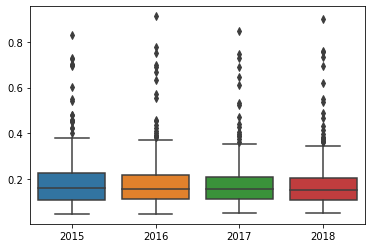

In [ ]:
sns.boxplot(data=CO_2015_2018[[2015, 2016, 2017, 2018]])

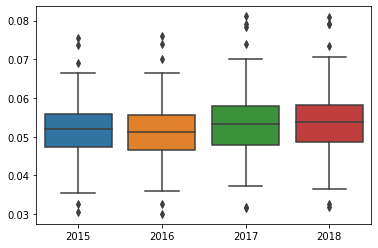

In [ ]:
sns.boxplot(data=O3_2015_2018[[2015, 2016, 2017, 2018]])

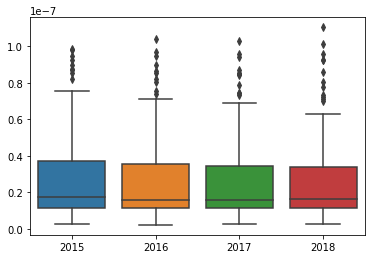

In [ ]:
sns.boxplot(data=PM_2015_2018[[2015, 2016, 2017, 2018]])

Можно сказать, что выбросы присутствую по каждому показтелю, хотя это только условно можно считать выбросами, это же раельные показатели в отдельных странах с высоким загрязнением и довольно любопытно как это коррелирует с другими показателями (здоровья, респираторной заболеваемостью, показателями счастья)

##### Duplicate and missing data

In [ ]:
# посмотрим на пропуски в данных
dfs = {'CO_2015_2018': CO_2015_2018, 'O3_2015_2018': O3_2015_2018, 'PM_2015_2018': PM_2015_2018}

for name, df in dfs.items():
  print(f' В {name} = {sum(df.isnull().sum())} пропусков')

 В CO_2015_2018 = 0 пропусков
 В O3_2015_2018 = 0 пропусков
 В PM_2015_2018 = 0 пропусков


In [ ]:
# посмотрим на дубликаты в данных
for name, df in dfs.items():
  print(f' В {name} = {df.duplicated().sum()} дубликатов')

 В CO_2015_2018 = 0 дубликатов
 В O3_2015_2018 = 0 дубликатов
 В PM_2015_2018 = 0 дубликатов


##### Features engeneering

In [ ]:
# добавим столбец по среднему показателю за 4 года
CO_2015_2018['CO_mean'] = CO_2015_2018.groupby('country')['CO'].transform('mean')
O3_2015_2018['O3_mean'] = O3_2015_2018.groupby('country')['O3'].transform('mean')
PM_2015_2018['PM_mean'] = PM_2015_2018.groupby('country')['PM'].transform('mean')

In [ ]:
# добавим столбец по изменению показателя за 4 года
#CO_2015_2018['uplift_CO'] = CO_2015_2018[2018] - CO_2015_2018[2015]
#O3_2015_2018['uplift_O3'] = O3_2015_2018[2018] - O3_2015_2018[2015]
#PM_2015_2018['uplift_PM'] = PM_2015_2018[2018] - PM_2015_2018[2015]
CO_2015_2018['uplift_CO'] = CO_2015_2018.groupby('country')['CO'].diff()
O3_2015_2018['uplift_O3'] = O3_2015_2018.groupby('country')['O3'].diff()
PM_2015_2018['uplift_PM'] = PM_2015_2018.groupby('country')['PM'].diff()

In [ ]:
O3_2015_2018

,country,year,O3,O3_mean,uplift_O3
0,Afghanistan,2015,0.057616,0.058226,NaN
1,Afghanistan,2016,0.057530,0.058226,-0.000087
2,Afghanistan,2017,0.058393,0.058226,0.000864
3,Afghanistan,2018,0.059366,0.058226,0.000973
4,Albania,2015,0.058433,0.059796,NaN
...,...,...,...,...,...
863,Zambia,2018,0.044849,0.045010,0.000015
864,Zimbabwe,2015,0.045374,0.044924,NaN
865,Zimbabwe,2016,0.044779,0.044924,-0.000594
866,Zimbabwe,2017,0.043821,0.044924,-0.000958


In [ ]:
# сделаем общую таблицу с показателями загрязнений за 2015-2018 года
df_2015_2018 = CO_2015_2018.merge(O3_2015_2018, on=['country', 'year'])
df_pollution_2015_2018 = df_2015_2018.merge(PM_2015_2018, on=['country', 'year'])
df_pollution_2015_2018.head()

,country,year,CO,CO_mean,uplift_CO,O3,O3_mean,uplift_O3,PM,PM_mean,uplift_PM
0,Afghanistan,2015,0.188489,0.189521,NaN,0.057616,0.058226,NaN,2.037780e-08,2.239198e-08,NaN
1,Afghanistan,2016,0.190931,0.189521,0.002441,0.057530,0.058226,-0.000087,2.067060e-08,2.239198e-08,2.928000e-10
2,Afghanistan,2017,0.195364,0.189521,0.004433,0.058393,0.058226,0.000864,2.057590e-08,2.239198e-08,-9.470000e-11
3,Afghanistan,2018,0.183300,0.189521,-0.012064,0.059366,0.058226,0.000973,2.794360e-08,2.239198e-08,7.367700e-09
4,Albania,2015,0.156164,0.146900,NaN,0.058433,0.059796,NaN,1.148180e-08,1.181145e-08,NaN


### Dataset: Mortality

In [ ]:
!git clone https://github.com/EugeneBaev-dsu4/pawfull.git
respiratory = pd.read_csv('pawfull/respiratory-disease-death-rate.csv')

fatal: destination path 'pawfull' already exists and is not an empty directory.


In [ ]:
respiratory

,country,Code,Year,ROD Resp
0,Afghanistan,AFG,1990,94.84
1,Afghanistan,AFG,1991,94.36
2,Afghanistan,AFG,1992,94.06
3,Afghanistan,AFG,1993,94.85
4,Afghanistan,AFG,1994,96.23
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,51.63
6836,Zimbabwe,ZWE,2016,51.02
6837,Zimbabwe,ZWE,2017,50.32
6838,Zimbabwe,ZWE,2018,49.63


In [ ]:
respiratory['Entity'].value_counts()

Afghanistan         30
Northern Ireland    30
Norway              30
OECD Countries      30
Oman                30
                    ..
Guam                30
Guatemala           30
Guinea              30
Guinea-Bissau       30
Zimbabwe            30
Name: Entity, Length: 228, dtype: int64

##### Converting to suitable data types

##### Outliers detection

##### Duplicate and missing data

### Dstaset: Smoking

In [ ]:
!git clone https://github.com/ekaterinatao/datatone_Pawfull
smoking = pd.read_csv('datatone_Pawfull/share-of-adults-who-smoke.csv')

fatal: destination path 'datatone_Pawfull' already exists and is not an empty directory.


In [ ]:
# Оставляем выделенные года
smoking = smoking[['country', 2015, 2016, 2017, 2018]]

In [ ]:
respiratory.rename(columns = {'Deaths - Chronic respiratory diseases - Sex: Both - Age: Age-standardized (Rate)': 'ROD Resp', 'Entity': "country"}, inplace = True)

In [ ]:
smoking.rename(columns = {'Prevalence of current tobacco use (% of adults)': 'ROD Smoke', 'Entity': "country"}, inplace = True)

In [ ]:
Respandsmoke = pd.merge(respiratory, smoking)

In [ ]:
#Resp increase - прирост смертности, smoke increase - прирост куращих
Respandsmoke['Increase Resp'] = Respandsmoke.groupby('country')['ROD Resp'].diff()
Respandsmoke['Increase Smoke'] = Respandsmoke.groupby('country')['ROD Smoke'].diff()

In [ ]:
Respandsmoke

,country,Code,Year,ROD Resp,ROD Smoke,Increase Resp,Increase Smoke
0,Afghanistan,AFG,2000,100.63,36.900002,NaN,NaN
1,Afghanistan,AFG,2005,92.62,32.700001,-8.01,-4.200001
2,Afghanistan,AFG,2010,81.60,29.100000,-11.02,-3.600000
3,Afghanistan,AFG,2015,72.11,26.000000,-9.49,-3.100000
4,Afghanistan,AFG,2018,68.95,23.799999,-3.16,-2.200001
...,...,...,...,...,...,...,...
979,Zimbabwe,ZWE,2005,51.85,18.100000,1.43,-2.900000
980,Zimbabwe,ZWE,2010,56.17,15.600000,4.32,-2.500000
981,Zimbabwe,ZWE,2015,51.63,13.600000,-4.54,-2.000000
982,Zimbabwe,ZWE,2018,49.63,12.100000,-2.00,-1.500000


In [ ]:
RNS_Poll = pd.merge(Respandsmoke, df_pollution_2015_2018)

In [ ]:
RNS_Poll

,country,Code,Year,ROD Resp,ROD Smoke,avg_CO,uplift_CO,avg_O3,uplift_O3,avg_PM,uplift_PM
0,Afghanistan,AFG,1990,94.84,6.73,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
1,Afghanistan,AFG,1991,94.36,6.75,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
2,Afghanistan,AFG,1992,94.06,6.89,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
3,Afghanistan,AFG,1993,94.85,6.95,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
4,Afghanistan,AFG,1994,96.23,6.87,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
...,...,...,...,...,...,...,...,...,...,...,...
5605,Zimbabwe,ZWE,2015,51.63,9.94,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5606,Zimbabwe,ZWE,2016,51.02,10.06,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5607,Zimbabwe,ZWE,2017,50.32,10.15,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5608,Zimbabwe,ZWE,2018,49.63,10.32,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09


In [ ]:
df_pollution_2015_2018

,country,avg_CO,uplift_CO,avg_O3,uplift_O3,avg_PM,uplift_PM
0,Wallis and Futuna Islands,0.049911,0.000096,0.044008,0.000329,6.147745e-09,-7.087400e-10
1,Niue,0.050223,0.000819,0.047979,0.001156,6.065932e-09,4.008300e-10
2,Tonga,0.050692,0.000152,0.049861,0.001295,6.179267e-09,3.681300e-10
3,Samoa,0.051645,-0.000690,0.043282,0.001417,5.755170e-09,-5.391000e-10
4,Cook Islands,0.050312,0.001944,0.048863,0.002125,6.447347e-09,7.159500e-10
...,...,...,...,...,...,...,...
212,China,0.693988,-0.010712,0.052419,0.003079,9.478845e-08,-6.229700e-09
213,Bangladesh,0.693429,0.042568,0.057282,0.001508,8.944395e-08,6.248500e-09
214,Pakistan,0.751941,0.032598,0.060464,0.000986,1.038777e-07,1.228320e-08
215,India,0.742585,0.030527,0.059446,0.000784,9.699768e-08,6.111500e-09


##### Converting to suitable data types

##### Outliers detection

##### Duplicate and missing data

### Dataset: Happiness

In [ ]:
!git clone https://github.com/EugeneBaev-dsu4/pawfull.git
happiness = pd.concat(
    [pd.read_csv(i).assign(year= i) for i in glob.glob('pawfull/happiness_201[5678]*')], 
    axis=0
)
happiness = happiness.reset_index(drop=True)
happiness['year'] = happiness['year'].apply(col_year).astype(int)
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year', 'Standard Error', 'Happiness.Rank',
       'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Overall rank',
       'Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
# В сете колонки с одинаковыми по смыслу данными, но в колонках с разным  названием, соберем в одно целое...
happiness['Country'] = happiness['Country'].combine_first(happiness['Country or region'])
happiness['Economy (GDP per Capita)'] = happiness['Economy (GDP per Capita)'].combine_first(happiness['GDP per capita'])
happiness['Economy (GDP per Capita)'] = happiness['Economy (GDP per Capita)'].combine_first(happiness['Economy..GDP.per.Capita.'])
happiness['Health (Life Expectancy)']= happiness['Health (Life Expectancy)'].combine_first(happiness['Healthy life expectancy'])
happiness['Health (Life Expectancy)']= happiness['Health (Life Expectancy)'].combine_first(happiness['Health..Life.Expectancy.'])
happiness['Trust (Government Corruption)'] = happiness['Trust (Government Corruption)'].combine_first(happiness['Perceptions of corruption'])
happiness['Trust (Government Corruption)'] = happiness['Trust (Government Corruption)'].combine_first(happiness['Trust..Government.Corruption.'])
happiness['Freedom'] = happiness['Freedom'].combine_first(happiness['Freedom to make life choices'])
happiness['Happiness Rank'] = happiness['Happiness Rank'].combine_first(happiness['Happiness.Rank'])
happiness['Happiness Score'] = happiness['Happiness Score'].combine_first(happiness['Happiness.Score'])
happiness['Lower Confidence Interval'] = happiness['Lower Confidence Interval'].combine_first(happiness['Whisker.low'])
happiness['Upper Confidence Interval'] = happiness['Upper Confidence Interval'].combine_first(happiness['Whisker.high'])
happiness['Dystopia Residual'] = happiness['Dystopia Residual'].combine_first(happiness['Dystopia.Residual'])

In [ ]:
# уберем ставшими ненужными колонки
happiness.drop(columns=['Country or region', 'GDP per capita','Economy..GDP.per.Capita.','Healthy life expectancy','Healthy life expectancy','Health..Life.Expectancy.','Perceptions of corruption','Trust..Government.Corruption.','Freedom to make life choices','Happiness Rank','Happiness.Rank','Happiness.Score','Whisker.low','Whisker.high','Dystopia.Residual'], inplace=True)

In [ ]:
happiness


In [ ]:
# Здесь убирались дубликаты стран, без этой строчки их как раз будет по количесттву датасетов.
happiness.drop_duplicates(subset=['Country'], keep='first',inplace=True)

In [ ]:
happiness.reset_index()

,index,Country,Region,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Standard Error,Overall rank,Score,Social support
0,0,Denmark,Western Europe,7.526,7.460000,7.592000,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390,2016,NaN,NaN,NaN,NaN
1,1,Switzerland,Western Europe,7.509,7.428000,7.590000,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,2016,NaN,NaN,NaN,NaN
2,2,Iceland,Western Europe,7.501,7.333000,7.669000,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2.831370,2016,NaN,NaN,NaN,NaN
3,3,Norway,Western Europe,7.498,7.421000,7.575000,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2.664650,2016,NaN,NaN,NaN,NaN
4,4,Finland,Western Europe,7.413,7.351000,7.475000,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2.825960,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,304,Central African Republic,Sub-Saharan Africa,3.678,NaN,NaN,0.078500,0.000000,0.066990,0.488790,0.082890,0.238350,2.722300,2015,0.06112,NaN,NaN,NaN
164,347,Taiwan Province of China,NaN,6.422,6.349404,6.494596,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,NaN,NaN
165,385,"Hong Kong S.A.R., China",NaN,5.472,5.394406,5.549594,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,NaN,NaN
166,507,Trinidad & Tobago,NaN,NaN,NaN,NaN,1.223000,NaN,0.564000,0.575000,0.019000,0.171000,NaN,2018,NaN,38.0,6.192,1.492


In [ ]:
happiness.columns

Index(['Country', 'Region', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'Standard Error',
       'Overall rank', 'Score', 'Social support'],
      dtype='object')

In [ ]:
# Убираем неинформативные признаки:
happiness = happiness.drop(columns=['Standard Error','Overall rank','Score','Social support'])

In [ ]:
# переводи в категоральный вид страны и регионы (нужно ли?)
happiness[['Country','Region']]=happiness[['Country','Region']].astype("category")
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 527
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        168 non-null    category
 1   Region                         164 non-null    category
 2   Happiness Score                166 non-null    float64 
 3   Lower Confidence Interval      159 non-null    float64 
 4   Upper Confidence Interval      159 non-null    float64 
 5   Economy (GDP per Capita)       168 non-null    float64 
 6   Family                         166 non-null    float64 
 7   Health (Life Expectancy)       168 non-null    float64 
 8   Freedom                        168 non-null    float64 
 9   Trust (Government Corruption)  168 non-null    float64 
 10  Generosity                     168 non-null    float64 
 11  Dystopia Residual              166 non-null    float64 
 12  year                           168 n

### Converting to suitable data types

### Outliers detection

### Duplicate and missing data

In [ ]:
happiness = happiness.dropna(subset=['Country'])

In [ ]:
happiness.duplicated().sum()

0

In [ ]:
happ_by_country = happiness.groupby(by='Happiness Score', as_index = False).agg('mean')
happ_by_country

,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
1,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
2,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
3,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
4,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
...,...,...,...,...,...,...,...,...,...,...
157,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
158,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
159,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
160,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [ ]:
happ_by_country.info

<bound method DataFrame.info of          Country  Happiness Score  Lower Confidence Interval  \
0    Afghanistan            3.360                      3.288   
1        Albania            4.655                      4.546   
2        Algeria            6.355                      6.227   
3         Angola            3.866                      3.753   
4      Argentina            6.650                      6.560   
..           ...              ...                        ...   
163    Venezuela            6.084                      5.973   
164      Vietnam            5.061                      4.991   
165        Yemen            3.724                      3.621   
166       Zambia            4.795                      4.645   
167     Zimbabwe            4.193                      4.101   

     Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                        3.432                   0.38227  0.11037   
1                        4.764                   0.95530  0.5

In [ ]:
happ_by_country.rename(columns = {'Country': 'country'}, inplace = True)

### Merging datasets
Нестеров А

In [ ]:
RNS_Poll

,country,Code,Year,ROD Resp,ROD Smoke,avg_CO,uplift_CO,avg_O3,uplift_O3,avg_PM,uplift_PM
0,Afghanistan,AFG,1990,94.84,6.73,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
1,Afghanistan,AFG,1991,94.36,6.75,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
2,Afghanistan,AFG,1992,94.06,6.89,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
3,Afghanistan,AFG,1993,94.85,6.95,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
4,Afghanistan,AFG,1994,96.23,6.87,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,7.565800e-09
...,...,...,...,...,...,...,...,...,...,...,...
5605,Zimbabwe,ZWE,2015,51.63,9.94,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5606,Zimbabwe,ZWE,2016,51.02,10.06,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5607,Zimbabwe,ZWE,2017,50.32,10.15,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09
5608,Zimbabwe,ZWE,2018,49.63,10.32,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,-2.357000e-09


In [ ]:
All = pd.merge(RNS_Poll, happ_by_country)

In [ ]:
All

,country,Code,Year,ROD Resp,ROD Smoke,avg_CO,uplift_CO,avg_O3,uplift_O3,avg_PM,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,AFG,1990,94.84,6.73,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Afghanistan,AFG,1991,94.36,6.75,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
2,Afghanistan,AFG,1992,94.06,6.89,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
3,Afghanistan,AFG,1993,94.85,6.95,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
4,Afghanistan,AFG,1994,96.23,6.87,0.189521,-0.005190,0.058226,0.001750,2.239198e-08,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,Zimbabwe,ZWE,2015,51.63,9.94,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,...,4.193,4.101,4.285,0.35041,0.71478,0.15950,0.25429,0.08582,0.18503,2.44270
4466,Zimbabwe,ZWE,2016,51.02,10.06,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,...,4.193,4.101,4.285,0.35041,0.71478,0.15950,0.25429,0.08582,0.18503,2.44270
4467,Zimbabwe,ZWE,2017,50.32,10.15,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,...,4.193,4.101,4.285,0.35041,0.71478,0.15950,0.25429,0.08582,0.18503,2.44270
4468,Zimbabwe,ZWE,2018,49.63,10.32,0.192544,-0.018489,0.044924,0.000348,1.644462e-08,...,4.193,4.101,4.285,0.35041,0.71478,0.15950,0.25429,0.08582,0.18503,2.44270


# EDA
### Feature engineering

### Descriptive statistics

### Hypothesis testing

### Check multicollinearity

### Feature selection

### Feature encoding

# Model building

In [ ]:
# можно выбрать любые модели